In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import MisrToolkit as mtk # needs python3.6
# from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob
import datetime as dt

In [2]:
# if (old_trainig_ds == 'on'):

def rename_oldDS_columns(in_transect):
    # rename columns
    in_transect.rename(columns={'#path':'path', ' orbit':'orbit', ' img_block':'block',\
                                 ' line':'line', ' sample':'sample',\
                                ' lat':'lat', ' lon':'lon',\
                                ' rms':'mean_ATM_roughness'}, inplace=True)
    print(in_transect.columns)
    
    return 0
    

In [3]:
def plot_error_mesh(subtract_error_2d):
    
    import matplotlib.pyplot as plt

    color_map = plt.imshow(subtract_error_2d)
    # color_map.set_cmap("OrRd")
    # color_map.set_cmap("Greys")
    # color_map.set_cmap("YlOrBr")
    # color_map.set_cmap("gist_yarg")
#     color_map.set_cmap("binary") 
    color_map.set_cmap("bwr")
    # color_map.set_cmap("Blues")

    plt.colorbar()

    plt.show()

    return 0

# ref: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [4]:
# from matplotlib import image as pltimg, pyplot as plt  #  pyplot uses the actual RGB values as they are, more accurate than PIL

def plot_here_and_write(in_arr, img_dir):
    write_mode = 0
#     img_label = 'path_'+path_num+'_'+'blocks_'+str(start_block)+'_'+str(end_block)+'_cam_'+cam
    img_format = ".jpg"
    %matplotlib inline 

    plt.gray() # This will show the images in grayscale as default

    plt.figure(figsize=(30,30))  # set the figure size

    plt.imshow(in_arr)
    plt.show()
    
    if (write_mode):
        print('save mode: on, we write images to disc')
        
        out_img = img_label+img_format
        out_img_fullpath = os.path.join(img_dir, out_img)
        print("-> output img is: %s" %out_img_fullpath)
        pltimg.imsave(out_img_fullpath, in_arr)
        #     plt.savefig(out_img)
    
    return 0

In [5]:
def remove_negatives(in_df, column_label):
    # remove negative values from DF

    index_list = in_df.loc[in_df[column_label] < 0].index
    print("size of list before removing negative MISR-rough data: %s" %len(in_df))

    in_df.drop(index_list, axis='index', inplace=True)
    print("size of list after removing negative MISR-rough data: %s" %len(in_df))
    
    return 0 # changes are inplace

In [6]:
sim_month = 'July 2016'

In [7]:
roughness_dir = '/Volumes/Ehsan-7757225325/2016/july_2016/all_roughness_subdirs_1_to_16_july2016'

# roughness_dir = '/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH'

In [8]:
os.path.isdir(roughness_dir)

True

In [9]:
# path to training dataset

# trainingDS_dir = "/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research/training_dataset"

# trainingDS_dir = "/Volumes/SEAGATE/april_2016/"
trainingDS_dir = '/Users/ehsanmos/MLP_dataset/july_2016'


trainingDS_csv = "atmmodel_july_2016_1to16.csv"
# trainingDS_csv = "atmmodel_april_2016.csv"

# trainingDS_csv = "valDS_lon215_220_lat75_77_atmmodel_july_2016.csv"


# # old method
# trainingDS_csv = "atmmodel_april_2016.csv"
# old_trainig_ds = 'on'

In [10]:
# open/read input dataset

atm_trainigDS_fp = os.path.join(trainingDS_dir, trainingDS_csv)
os.path.isfile(atm_trainigDS_fp)

True

In [11]:
atm_transect = pd.read_csv(atm_trainigDS_fp)

In [12]:
atm_transect.shape

(47811, 15)

In [13]:
atm_transect.columns[0]

'#path'

In [14]:
if (atm_transect.columns[0] == '#path'):
    rename_oldDS_columns(atm_transect)

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', ' npts', ' cloud', ' var'],
      dtype='object')


In [15]:
# info of path-orbit-block and then select absed on this info

# atm_transect['path'].value_counts()

In [16]:
# atm_transect['orbit'].value_counts()

In [17]:
# atm_transect['block'].value_counts()

### ==========================================================================

## we need cloud mask here to make sure the block is not cloudy

how examine a MISR block is not cloudy? we can open HDF file and check some things in it, 
we need a mask flag (dataset) here to open and check the flag and determine if the block 
is cloudy or not, and then we can decide to use it or not here!

we should run an algorithm on images and determine cloudiness ration/percent/probability 
in each MISR image and then we can write the % or ratio in a seperate dataset for each POB.


### ==========================================================================

In [107]:
# select POB to extract
# note: we selected an arbiterary POB as following 
# Arbitrary POB

selected_path = 173
selected_orbit = 88132
selected_block = 8


In [108]:
atm_transect.columns

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', ' npts', ' cloud', ' var'],
      dtype='object')

In [109]:
# remove zeros

filter_zeros_cond = (atm_transect['path']==0) & (atm_transect['orbit']==0) & (atm_transect['block']==0)

zero_index_list = atm_transect.index[filter_zeros_cond].tolist()
print('number of zeros found in DS: %s' %len(zero_index_list))

atm_transect.drop(labels=zero_index_list, axis=0, inplace=True)
atm_transect.head()

number of zeros found in DS: 0


,path,orbit,block,line,sample,lat,lon,an,ca,cf,mean_ATM_roughness,weight,npts,cloud,var
0,93,88127,29,52,1912,74.129692,199.405884,-1.0,-1.0,-1.0,12.21375,0.5,4.0,1,1.464982
1,93,88127,29,52,1911,74.131224,199.399082,-1.0,-1.0,-1.0,7.80375,0.5,4.0,1,1.717774
2,93,88127,29,52,1910,74.132759,199.392283,-1.0,-1.0,-1.0,9.03625,0.5,4.0,1,3.045730
3,93,88127,29,52,1909,74.134296,199.385486,-1.0,-1.0,-1.0,9.03125,0.5,4.0,1,5.542873
4,93,88127,29,52,1908,74.135832,199.378687,-1.0,-1.0,-1.0,9.81000,0.5,4.5,1,3.955064


In [110]:
atm_transect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47811 entries, 0 to 47810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                47811 non-null  int64  
 1   orbit               47811 non-null  int64  
 2   block               47811 non-null  int64  
 3   line                47811 non-null  int64  
 4   sample              47811 non-null  int64  
 5   lat                 47811 non-null  float64
 6   lon                 47811 non-null  float64
 7    an                 47811 non-null  float64
 8    ca                 47811 non-null  float64
 9    cf                 47811 non-null  float64
 10  mean_ATM_roughness  47811 non-null  float64
 11   weight             47811 non-null  float64
 12   npts               47811 non-null  float64
 13   cloud              47811 non-null  int64  
 14   var                47811 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 6.8 MB


In [111]:
# # delete the first column

# atm_transect_small.drop(labels='Unnamed: 0', axis=1, inplace=True)
# atm_transect_small.columns

In [112]:
# change dtype of columns to int

atm_transect = atm_transect.astype({'path':int, 'orbit':int, 'block':int, 'line':int, 'sample':int})
atm_transect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47811 entries, 0 to 47810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                47811 non-null  int64  
 1   orbit               47811 non-null  int64  
 2   block               47811 non-null  int64  
 3   line                47811 non-null  int64  
 4   sample              47811 non-null  int64  
 5   lat                 47811 non-null  float64
 6   lon                 47811 non-null  float64
 7    an                 47811 non-null  float64
 8    ca                 47811 non-null  float64
 9    cf                 47811 non-null  float64
 10  mean_ATM_roughness  47811 non-null  float64
 11   weight             47811 non-null  float64
 12   npts               47811 non-null  float64
 13   cloud              47811 non-null  int64  
 14   var                47811 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 6.8 MB


In [113]:
# atm_transect.head(20)

In [114]:
# set filters to select a MISR block from ATM dataset

path_filter = (atm_transect['path']==selected_path)
orbit_filter = (atm_transect['orbit']==selected_orbit)
block_filter = (atm_transect['block']==selected_block)

atm_transect_in_block = atm_transect.loc[path_filter & orbit_filter & block_filter]
print('DS shape after filtering for our target block... (%s, %s)' %atm_transect_in_block.shape)
atm_transect_in_block.head()


DS shape after filtering for our target block... (429, 15)


,path,orbit,block,line,sample,lat,lon,an,ca,cf,mean_ATM_roughness,weight,npts,cloud,var
11272,173,88132,8,219,45,75.037855,194.840937,-1.0,-1.0,1.197909,3.600000,0.5,0.5,1,0.000000
11273,173,88132,8,219,46,75.038355,194.838102,-1.0,-1.0,1.188517,7.823333,0.5,1.5,1,1.780306
11274,173,88132,8,222,48,75.043368,194.809752,-1.0,-1.0,1.259384,5.472500,0.5,2.0,1,1.143446
11275,173,88132,8,223,48,75.044372,194.804081,-1.0,-1.0,1.343485,3.771429,0.5,3.5,1,0.570249
11276,173,88132,8,223,49,75.045543,194.797467,-1.0,-1.0,1.345620,5.436667,0.5,1.5,1,1.850844


## write out

In [115]:
# # write some portion of it

# sample_df = atm_transect_in_block.head(20)
# sample_df.to_csv(os.path.join(trainingDS_dir, 'atmmodel_april_2016_smallDS.csv'), index=False)

## change max step

In [116]:
# maybe if we want to select a smaller subset of the selected transect, like the first 100 points (or 10)

# max_step = 100
max_step = atm_transect_in_block.shape[0]

atm_transect_in_block = atm_transect_in_block.iloc[0:max_step]

In [117]:
atm_transect_in_block.shape

(429, 15)

In [118]:
# sort by column ("line")

# atm_transect_in_block.sort_values(by='line', axis=0, inplace=True) # axis=0 == column names
# atm_transect_in_block.head(50)


In [119]:
# check for duplicates in rows of dataset




In [120]:
# zfill() path and string it

if selected_path < 100:
    path_str = str(selected_path).zfill(3)
else:
    path_str = str(selected_path)


# zfill() block and string it
if selected_block < 10:
    block_str = str(selected_block).zfill(2)
else:
    block_str = str(selected_block)

In [121]:
#- find roughness file from pattern of roughness.dat file

roughness_file_pattern = "roughness_toa_refl_P"+path_str+"_O0"+str(selected_orbit)+"_B0"+block_str+".dat"
print('looking for pattern: %s' %roughness_file_pattern)

# find roughness file
rough_file_list = glob.glob(os.path.join(roughness_dir, roughness_file_pattern))
print('found:')
print(rough_file_list)

if (len(rough_file_list) < 1):
    raise ValueError("roughness list came out empty!")

if (len(rough_file_list) > 1):
    raise ValueError("roughness list has more that 1 file! there should be an error in our logic!")

looking for pattern: roughness_toa_refl_P173_O088132_B008.dat
found:
['/Volumes/Ehsan-7757225325/2016/july_2016/all_roughness_subdirs_1_to_16_july2016/roughness_toa_refl_P173_O088132_B008.dat']


In [122]:
# open roughness binary file and change binary to array

misr_rough_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
print(misr_rough_2d_arr.shape)

(512, 2048)


In [123]:
# extract lat lon arrays

misr_lat_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[1048576:2097152].reshape((512,-1))
print(misr_lat_2d_arr.dtype)
print(misr_lat_2d_arr.shape)

misr_lon_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[2097152:3145728].reshape((512,-1))
print(misr_lon_2d_arr)


float64
(512, 2048)
[[  21.40622053   21.39759566   21.38897174 ...    5.93078905
     5.92430182    5.91781563]
 [  21.40287175   21.39424581   21.38562083 ...    5.92606567
     5.91957812    5.91309161]
 [  21.39952201   21.390895     21.38226895 ... -179.48638406
  -179.49287193 -179.49935877]
 ...
 [-165.83907226 -165.84826966 -165.85746587 ...  150.16805184
   177.97257458  177.9659397 ]
 [-165.84296501 -165.85216359 -165.86136098 ...  177.97392436
   177.96728804  177.9606529 ]
 [-165.84685896 -165.85605872 -165.86525729 ...  177.9686369
   177.96200032  177.95536492]]


In [124]:
# check value for sample lat-lon

for end_black in range(misr_rough_2d_arr.shape[1]):
    if misr_rough_2d_arr[0, end_black] > 0:
        print(end_black)
        break

500


In [125]:
print(misr_rough_2d_arr[0, end_black-10])
print(misr_lat_2d_arr[0, end_black-10])
print(misr_lon_2d_arr[0, end_black-10])

-1.0
74.10405700537638
-168.1095271035903


<Figure size 432x288 with 0 Axes>

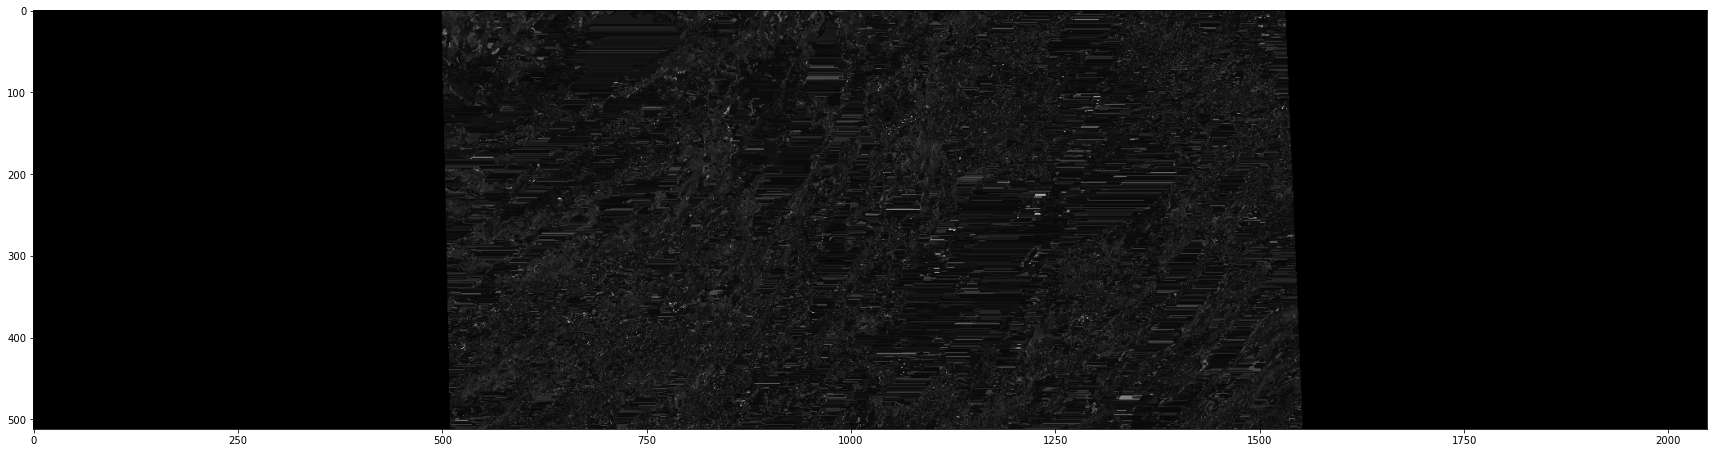

0

In [126]:
# plot roughness array

plot_here_and_write(misr_rough_2d_arr, trainingDS_dir)

In [127]:
# MVP with one line for lat-lon method

irow = 0

# find line/sample in the selected block
atm_line = atm_transect_in_block['line'].iloc[irow]
atm_sample = atm_transect_in_block['sample'].iloc[irow]
average_atm = atm_transect_in_block['mean_ATM_roughness'].iloc[irow]

atm_lat = atm_transect_in_block['lat'].iloc[irow]
atm_lon = atm_transect_in_block['lon'].iloc[irow]
if (atm_lon>180):
    atm_lon_west = atm_lon-360.0
    
print('%s, %s, %s, %s, %s' %(atm_line, atm_sample, average_atm, atm_lat, atm_lon_west))

219, 45, 3.6, 75.03785500000001, -165.15906299999995


In [128]:
# extract MISR roughness based on single lat-lon

atm_lat = 81.050398
atm_lon = -152.181889 # should use ATM-lon West format

In [129]:
abslat = np.abs(misr_lat_2d_arr - atm_lat) # element-wise
abslon = np.abs(misr_lon_2d_arr - atm_lon) # element-wise

abslon

array([[173.58810953, 173.57948466, 173.57086074, ..., 158.11267805,
        158.10619082, 158.09970463],
       [173.58476075, 173.57613481, 173.56750983, ..., 158.10795467,
        158.10146712, 158.09498061],
       [173.58141101, 173.572784  , 173.56415795, ...,  27.30449506,
         27.31098293,  27.31746977],
       ...,
       [ 13.65718326,  13.66638066,  13.67557687, ..., 302.34994084,
        330.15446358, 330.1478287 ],
       [ 13.66107601,  13.67027459,  13.67947198, ..., 330.15581336,
        330.14917704, 330.1425419 ],
       [ 13.66496996,  13.67416972,  13.68336829, ..., 330.1505259 ,
        330.14388932, 330.13725392]])

In [130]:
maximum = np.maximum(abslon, abslat)
print(maximum)


[[173.58810953 173.57948466 173.57086074 ... 158.11267805 158.10619082
  158.09970463]
 [173.58476075 173.57613481 173.56750983 ... 158.10795467 158.10146712
  158.09498061]
 [173.58141101 173.572784   173.56415795 ...  27.30449506  27.31098293
   27.31746977]
 ...
 [ 13.65718326  13.66638066  13.67557687 ... 302.34994084 330.15446358
  330.1478287 ]
 [ 13.66107601  13.67027459  13.67947198 ... 330.15581336 330.14917704
  330.1425419 ]
 [ 13.66496996  13.67416972  13.68336829 ... 330.1505259  330.14388932
  330.13725392]]


In [131]:
latlon_idx = np.argmin(maximum) # for flaten array and lat-lon
print(latlon_idx)

1035894


In [132]:
# extract MISR roughness w/lat-lon

roughness_in_grid = misr_rough_2d_arr.flat[latlon_idx]
roughness_in_grid

-1.0

In [133]:
line_atm = (latlon_idx/2048)
print('line: %s' %line_atm)

sample_atm = (line_atm%1)*2048
print('sample: %s' %sample_atm)

line: 505.8076171875
sample: 1654.0


In [134]:
# extract MISR roughness w/line-sample

rough = misr_rough_2d_arr[int(line_atm), int(sample_atm)]
rough

-1.0

In [135]:
# # plot lat-lon diffs

# plot_error_mesh(c)
# # plot_error_mesh(abslon)

In [136]:
# # try to find ATM in MISR array



# found_locations = np.where(misr_lat_2d_arr == atm_lat)
# found_locations

## find <roughess.dat> files

In [137]:
# misr_roughness_in_pixel_list = [] do not use it anymore
plot_ds = []

for irow in range(atm_transect_in_block.shape[0]):

    # find line/sample and mean ATM in the selected block
    atm_line = atm_transect_in_block['line'].iloc[irow]
    atm_sample = atm_transect_in_block['sample'].iloc[irow]
    average_atm = atm_transect_in_block['mean_ATM_roughness'].iloc[irow]
#     print(atm_line, atm_sample)
    
    atm_lat = atm_transect_in_block['lat'].iloc[irow]
    atm_lon = atm_transect_in_block['lon'].iloc[irow]
    
    if (atm_lon>180):
        atm_lon_west = atm_lon-360.0
        


    # we find MISR L-S==pixel that ATM sample falls into it   
    misr_roughness_in_pixel_lineSample = misr_rough_2d_arr[atm_line, atm_sample]
    
#     misr_roughness_in_pixel_lineSample_up = misr_rough_2d_arr[atm_line-1, atm_sample]
#     misr_roughness_in_pixel_lineSample_down = misr_rough_2d_arr[atm_line+1, atm_sample]
#     misr_roughness_in_pixel_lineSample_before = misr_rough_2d_arr[atm_line, atm_sample-1]
#     misr_roughness_in_pixel_lineSample_after = misr_rough_2d_arr[atm_line, atm_sample+1]
#     misr_roughness_in_pixel_lineSample_up_before = misr_rough_2d_arr[atm_line-1, atm_sample-1]
#     misr_roughness_in_pixel_lineSample_up_after = misr_rough_2d_arr[atm_line-1, atm_sample+1]
#     misr_roughness_in_pixel_lineSample_down_before = misr_rough_2d_arr[atm_line+1, atm_sample-1]
#     misr_roughness_in_pixel_lineSample_down_after = misr_rough_2d_arr[atm_line+1, atm_sample+1]

    misr_neighborhood_ls = misr_roughness_in_pixel_lineSample
    
#     misr_neighborhood_ls = [misr_roughness_in_pixel_lineSample,
#                            misr_roughness_in_pixel_lineSample_up,
#                            misr_roughness_in_pixel_lineSample_down,
#                            misr_roughness_in_pixel_lineSample_before,
#                            misr_roughness_in_pixel_lineSample_after,
#                            misr_roughness_in_pixel_lineSample_up_before,
#                            misr_roughness_in_pixel_lineSample_up_after,
#                            misr_roughness_in_pixel_lineSample_down_before,
#                            misr_roughness_in_pixel_lineSample_down_after]
    
    misr_roughness_in_pixel_ls = np.mean(misr_neighborhood_ls)
    print('LS mean: %s' %misr_roughness_in_pixel_ls)
    
    #################################################################
    
    # find MISR pixels based on lat-lon
    abslat = np.abs(misr_lat_2d_arr - atm_lat) # element-wise
    abslon = np.abs(misr_lon_2d_arr - atm_lon_west) # element-wise, should use ATM lon West format here
    # 
    maximum = np.maximum(abslon, abslat)
    latlon_idx = np.argmin(maximum) # for flaten array and lat-lon
    
    
    # based on lat-lon
    misr_roughness_in_pixel_latlon_in_pixel = misr_rough_2d_arr.flat[latlon_idx]
    
    
#     misr_roughness_in_pixel_latlon_up = misr_rough_2d_arr.flat[latlon_idx-2048]
#     misr_roughness_in_pixel_latlon_down = misr_rough_2d_arr.flat[latlon_idx+2048]
#     misr_roughness_in_pixel_latlon_up_before = misr_rough_2d_arr.flat[latlon_idx-2048-1]
#     misr_roughness_in_pixel_latlon_up_after = misr_rough_2d_arr.flat[latlon_idx-2048+1]
#     misr_roughness_in_pixel_latlon_down_before = misr_rough_2d_arr.flat[latlon_idx+2048-1]
#     misr_roughness_in_pixel_latlon_down_after = misr_rough_2d_arr.flat[latlon_idx+2048+1]
#     misr_roughness_in_pixel_latlon_before = misr_rough_2d_arr.flat[latlon_idx-1]
#     misr_roughness_in_pixel_latlon_after = misr_rough_2d_arr.flat[latlon_idx+1]
    
    
    misr_neighborhood_latlon = [misr_roughness_in_pixel_latlon_in_pixel]
    
    
#     misr_neighborhood_latlon = [misr_roughness_in_pixel_latlon_in_pixel,\
#                          misr_roughness_in_pixel_latlon_up,\
#                          misr_roughness_in_pixel_latlon_down,\
#                          misr_roughness_in_pixel_latlon_up_before,\
#                          misr_roughness_in_pixel_latlon_up_after,\
#                          misr_roughness_in_pixel_latlon_down_before,\
#                          misr_roughness_in_pixel_latlon_down_after,\
#                          misr_roughness_in_pixel_latlon_before,\
#                          misr_roughness_in_pixel_latlon_after]
                         

    
#     print(misr_neighborhood)
    misr_roughness_in_pixel_latlon = np.mean(misr_neighborhood_latlon)
    print('latlon mean: %s' %misr_roughness_in_pixel_latlon)
    



#     c = np.maximum(abslon, abslat)
#     latlon_idx = np.argmin(c) # for flaten array
#     roughness_in_grid = misr_rough_2d_arr.flat[latlon_idx]
#     print(roughness_in_grid)
    
    # append predixted value to our list
    plot_ds.append((atm_line, atm_sample, atm_lat, atm_lon_west, average_atm, misr_roughness_in_pixel_ls, misr_roughness_in_pixel_latlon)) #roughness_in_grid))

#     if misr_roughness > 1:
#         misr_roughness_in_pixel_list.append(misr_roughness)
#     else:
#         print('MISR roughness in pixel: %s' %misr_roughness)
#         raise ValueError("why MISR roughness is negative for an ATM location? model error? or something else?")

plot_ds_colName = ['atm_lin', 'atm_sample', 'atm_lat', 'atm_lon_west', 'mean_ATM', 'misr_roughness_in_pixel_lineSample', 'misr_roughness_in_pixel_latlon']

print("\ntotal MISR-roughness pixels found: %s" %len(plot_ds))


LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean:

latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon mean: -1.0
LS mean: -1.0
latlon m

In [138]:
plot_ds_colName

['atm_lin',
 'atm_sample',
 'atm_lat',
 'atm_lon_west',
 'mean_ATM',
 'misr_roughness_in_pixel_lineSample',
 'misr_roughness_in_pixel_latlon']

In [139]:
# plot_ds

In [140]:
atm_transect_in_block.columns

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', ' npts', ' cloud', ' var'],
      dtype='object')

In [141]:
# # build a single DF from both ATM and MISR lists and add "misr_roughness_in_pixel_list" to it

# atm_transect_in_block['MISR-roughness'] = misr_roughness_in_pixel_list
# atm_transect_in_block.columns

In [142]:
# # remove negative values from DF

# negative_misr_index_list = atm_transect_in_block.loc[atm_transect_in_block['MISR-roughness'] < 0].index
# print("size of list before removing negative MISR-rough data: %s" %len(atm_transect_in_block))
# atm_transect_in_block.drop(negative_misr_index_list, axis='index', inplace=True)
# print("size of list after removing negative MISR-rough data: %s" %len(atm_transect_in_block))


In [143]:
# row_count = atm_transect_in_block.shape[0]
# row_count

In [144]:
# build a dataframe from list

plot_df = pd.DataFrame(plot_ds, columns=plot_ds_colName)
plot_df['misr_roughness_in_pixel_latlon'].head(10)

0   -1.0
1   -1.0
2   -1.0
3   -1.0
4   -1.0
5   -1.0
6   -1.0
7   -1.0
8   -1.0
9   -1.0
Name: misr_roughness_in_pixel_latlon, dtype: float64

In [145]:
# remove -1 from dataset

remove_negatives(plot_df, 'misr_roughness_in_pixel_latlon')
# plot_df

size of list before removing negative MISR-rough data: 429
size of list after removing negative MISR-rough data: 0


0

## plot transect

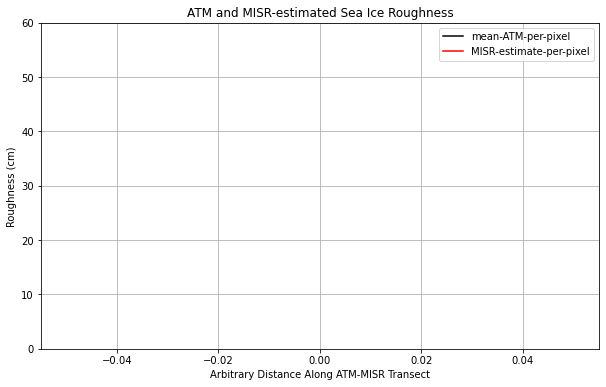

In [146]:
# plot based on line-sample

x= range(plot_df.shape[0])

fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(x, plot_df['mean_ATM'], color='black', label='mean-ATM-per-pixel')
ax.plot(x, plot_df['misr_roughness_in_pixel_lineSample'], color='red', label='MISR-estimate-per-pixel')

# Same as above
ax.set_ylim([0, 60])
ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect')
ax.set_ylabel('Roughness (cm)')
ax.set_title('ATM and MISR-estimated Sea Ice Roughness')
ax.grid(True)
ax.legend(loc='upper right');

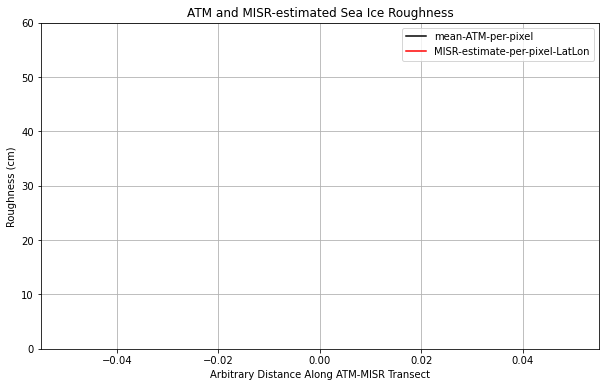

In [147]:
# plot based on lat-lon

x= range(plot_df.shape[0])

fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(x, plot_df['mean_ATM'], color='black', label='mean-ATM-per-pixel')
ax.plot(x, plot_df['misr_roughness_in_pixel_latlon'], color='red', label='MISR-estimate-per-pixel-LatLon')

# Same as above
ax.set_ylim([0, 60])
ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect')
ax.set_ylabel('Roughness (cm)')
ax.set_title('ATM and MISR-estimated Sea Ice Roughness')
ax.grid(True)
ax.legend(loc='upper right');

In [148]:
# # x = range(len(misr_roughness_in_pixel_list))
# x= range(row_count)

# fig, ax = plt.subplots(figsize=(10, 6))

# # Specify how our lines should look
# ax.plot(x, atm_transect_in_block['mean_ATM_roughness'], color='black', label='mean-ATM-per-pixel')
# ax.plot(x, atm_transect_in_block['MISR-roughness'], color='red', label='MISR-estimated-per-pixel')

# # Same as above
# ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect')
# ax.set_ylabel('Roughness (cm)')
# ax.set_title('ATM and MISR-estimated Sea Ice Roughness')
# ax.grid(True)
# ax.legend(loc='upper right');

In [60]:
bin_size = 50

## histogram of transect

Text(0.5, 1.0, 'Histogram')

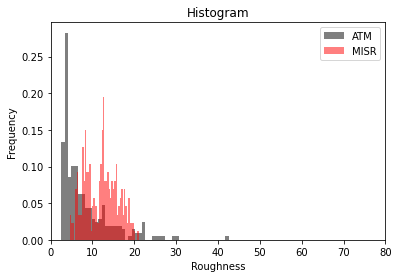

In [61]:
plt.hist(plot_df['mean_ATM'], density=True, bins=bin_size, label='ATM', color='black', alpha=0.5)  # density=False would make counts
plt.hist(plot_df['misr_roughness_in_pixel_lineSample'], density=True, bins=bin_size, label='MISR', color='red', alpha=0.5)  # density=False would make counts
plt.xlim(0,80)

plt.xlabel('Roughness')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title("Histogram")


Text(0.5, 1.0, 'Histogram')

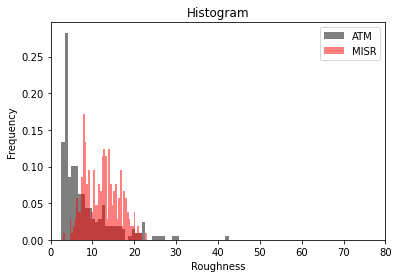

In [62]:
plt.hist(plot_df['mean_ATM'], density=True, bins=bin_size, label='ATM', color='black', alpha=0.5)  # density=False would make counts
plt.hist(plot_df['misr_roughness_in_pixel_latlon'], density=True, bins=bin_size, label='MISR', color='red', alpha=0.5)  # density=False would make counts
plt.xlim(0,80)

plt.xlabel('Roughness')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title("Histogram")


## statistics of transect

In [63]:
# describe the statistics

atm_transect_in_block['mean_ATM_roughness'].describe()

count    306.000000
mean       7.578196
std        5.784361
min        2.596667
25%        3.712916
50%        5.337777
75%        9.185313
max       42.593333
Name: mean_ATM_roughness, dtype: float64

In [64]:
# change list to DF

# misr_roughness_in_pixel_df = pd.DataFrame(misr_roughness_in_pixel_list, columns=['rms'])

In [65]:
atm_transect_in_block['MISR-roughness'].describe()

KeyError: 'MISR-roughness'

## now calculate histogram and statistics for the whole BOX

In [ ]:
misr_roughness_in_pixel_list_box = find_misr_roughness_per_pixel(atm_transect_small)

In [ ]:
# build a single DF from both ATM and MISR lists and add "misr_roughness_in_pixel_list" to it

atm_transect_small['MISR-roughness'] = misr_roughness_in_pixel_list_box
atm_transect_small.columns

In [ ]:
# # remove negative values from DF

# negative_misr_index_list_box = atm_transect_small.loc[atm_transect_small['MISR-roughness'] < 0].index
# print("size of list before removing negative MISR-rough data: %s" %len(atm_transect_small))

# atm_transect_small.drop(negative_misr_index_list_box, axis='index', inplace=True)
# print("size of list after removing negative MISR-rough data: %s" %len(atm_transect_small))


## plot histogram for BOX

In [ ]:
hist_bounds = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
n, bins, bounds=plt.hist(atm_transect_small['mean_ATM_roughness'], density=True, bins=hist_bounds, label='ATM', color='black', alpha=0.5)  # density=False would make counts
plt.hist(atm_transect_small['MISR-roughness'], density=True, bins=hist_bounds, label='MISR', color='red', alpha=0.5)  # density=False would make counts

plt.xticks(bins)
plt.xlabel('Roughness')
# plt.xticks(range(10))

plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title("ATM vs. MISR for %s" %sim_month)


In [ ]:
# describe ATM statistics of BOX

atm_transect_small['mean_ATM_roughness'].describe()

In [ ]:
# describe MISR statistics of BOX

atm_transect_small['MISR-roughness'].describe()

In [ ]:
# april-box-good

# selected_path = 152
# selected_orbit = 86922
# selected_block = 9

# july-box-good

# selected_path = 149
# selected_orbit = 88247
# selected_block = 9


